In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, int64

In [14]:
plt.rcParams.update({'font.size': 14})

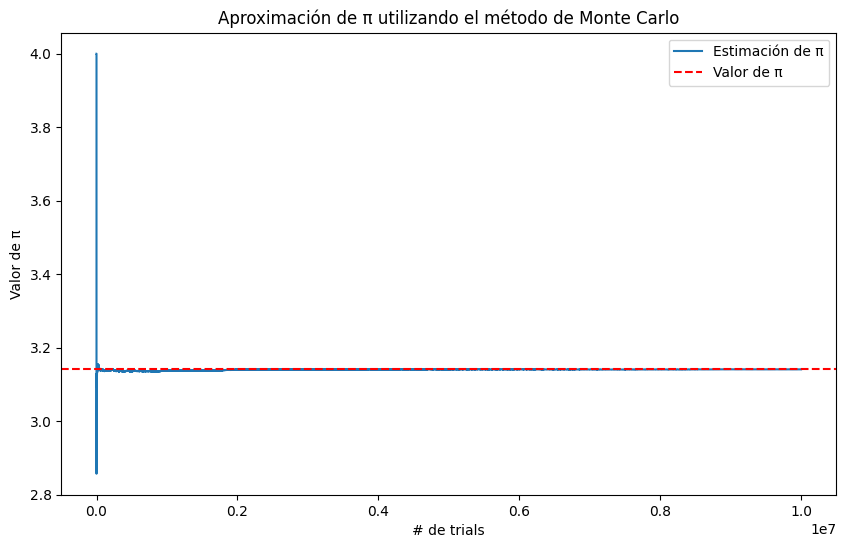

In [2]:
# Función para aproximar pi mediante el método de Monte Carlo
def calcular_pi(n_trials):
    n_hits = 0
    pi_estimado = []

    for i in range(1, n_trials + 1):
        # Genera puntos aleatorios (x, y) en el rango [-1, 1]
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)

        # Verifica si el punto está dentro del círculo unitario
        if x**2 + y**2 <= 1:
            n_hits += 1

        # Calcula la estimación de pi
        pi_aprox = 4 * n_hits / i
        pi_estimado.append(pi_aprox)

    return pi_estimado

# Número de pruebas
n_trials = 10**7

# Calcula la aproximación de pi para los n_trials
pi_estimado = calcular_pi(n_trials)

# Genera el gráfico
plt.figure(figsize=(10, 6))  # Aumentar el tamaño del gráfico
plt.plot(range(1, n_trials + 1), pi_estimado, label='Estimación de π')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor de π')  # Línea punteada en pi
plt.xlabel('# de trials')
plt.ylabel('Valor de π')
plt.title('Aproximación de π utilizando el método de Monte Carlo')
plt.legend()
plt.show()


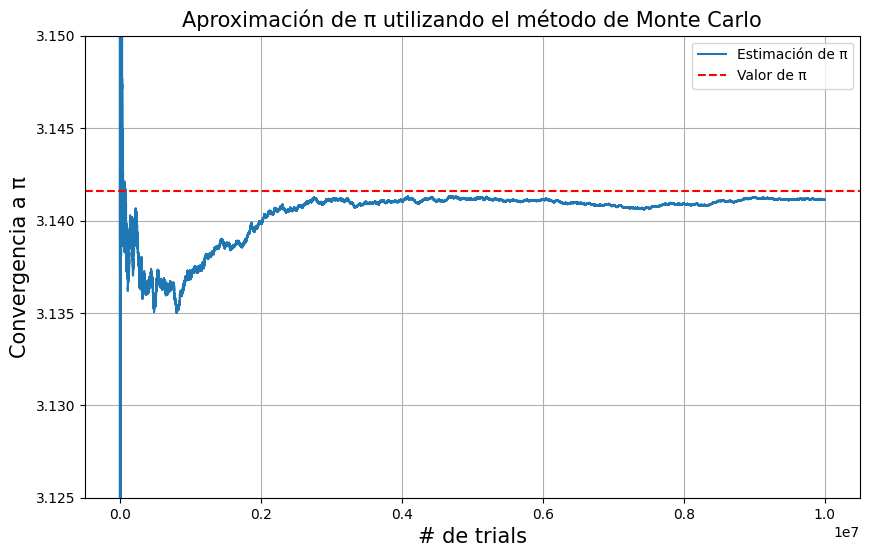

In [8]:
def graficar_con_zoom(pi_estimado, n_trials, y_min, y_max):
    plt.figure(figsize=(10, 6))  # Aumentar el tamaño del gráfico
    plt.plot(range(1, n_trials + 1), pi_estimado, label='Estimación de π')
    plt.axhline(y=np.pi, color='r', linestyle='--', label='Valor de π')  # Línea punteada en pi
    plt.xlabel('# de trials', fontsize =15)
    plt.ylabel('Convergencia a π', fontsize =15)
    plt.title('Aproximación de π utilizando el método de Monte Carlo', fontsize =15)
    plt.ylim([y_min, y_max])  # Aplicar zoom en el eje y
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función con un rango de zoom en el eje Y
y_min_zoom = 3.125
y_max_zoom = 3.15

graficar_con_zoom(pi_estimado, n_trials, y_min_zoom, y_max_zoom)

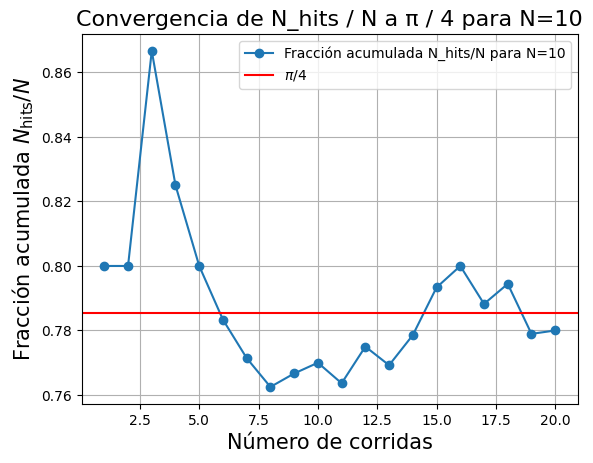

Desviación cuadrática media para N = 10: 0.0005725365980518788


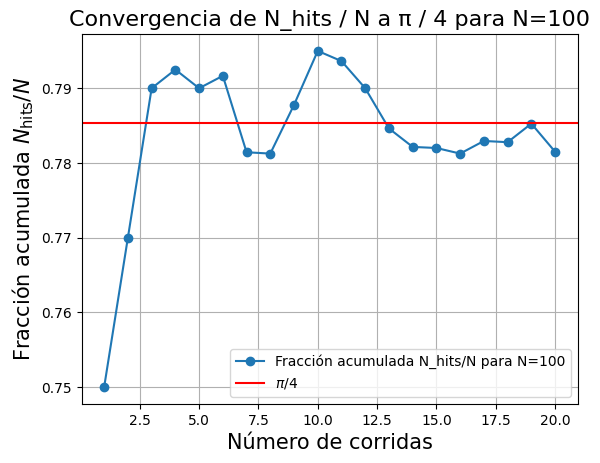

Desviación cuadrática media para N = 100: 9.55083331962612e-05


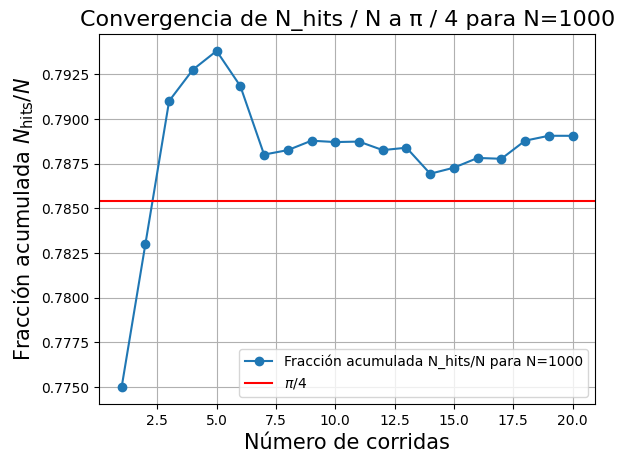

Desviación cuadrática media para N = 1000: 2.160212273494976e-05


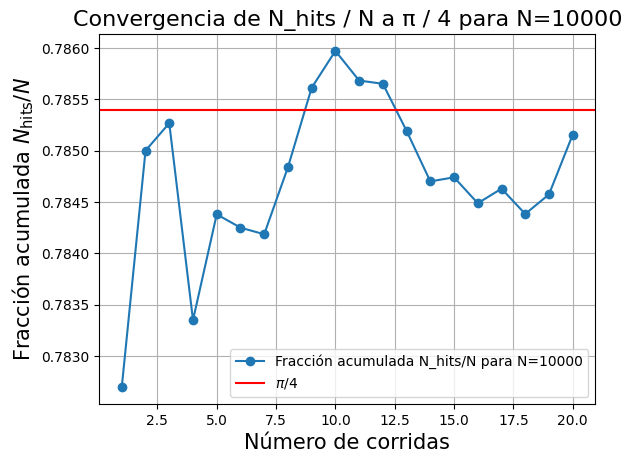

Desviación cuadrática media para N = 10000: 1.0229235654750097e-06


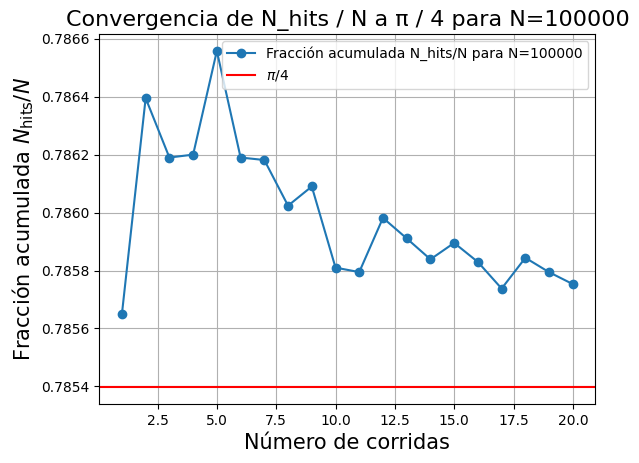

Desviación cuadrática media para N = 100000: 3.9682556296727714e-07


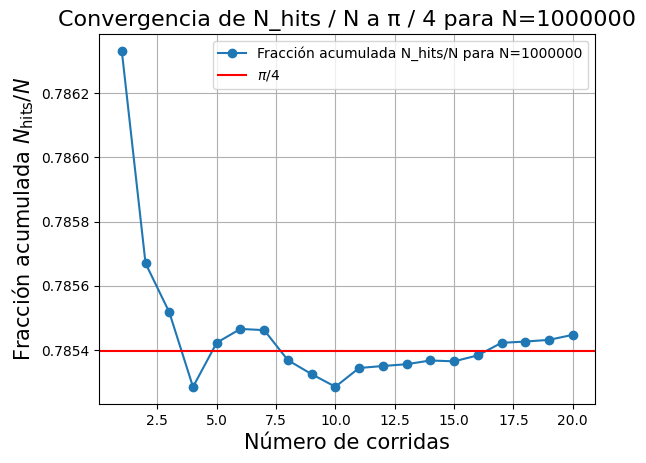

Desviación cuadrática media para N = 1000000: 5.078178511928033e-08


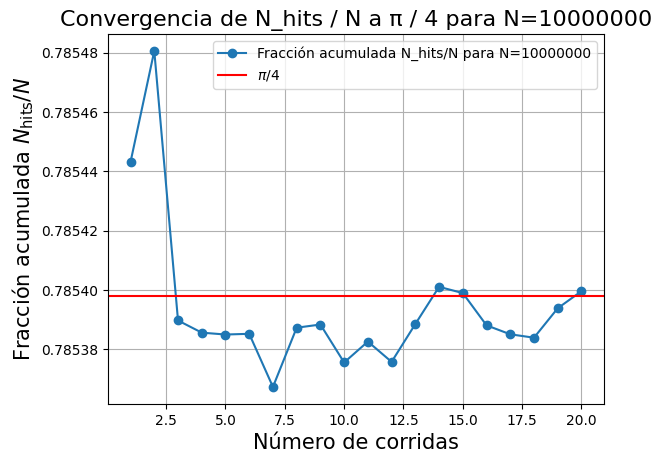

Desviación cuadrática media para N = 10000000: 6.19478133802114e-10


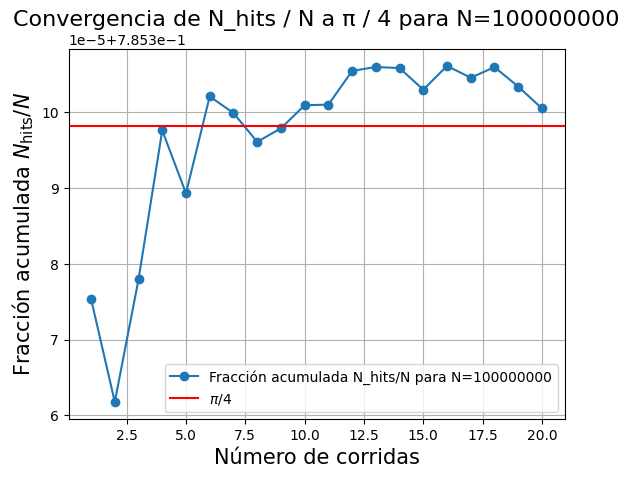

Desviación cuadrática media para N = 100000000: 1.3807503115784093e-10


In [7]:


# Función optimizada de Monte Carlo para aproximar pi
def direct_pi_optimizado(N):
    # Genera N puntos aleatorios (x, y) en el rango [-1, 1] de una sola vez
    x = np.random.uniform(-1, 1, N)
    y = np.random.uniform(-1, 1, N)
    
    # Calcula la distancia de los puntos al origen y cuenta cuántos están dentro del círculo
    dentro_del_circulo = x**2 + y**2 <= 1
    n_hits = np.sum(dentro_del_circulo)  # Cuenta los puntos dentro del círculo
    return n_hits

# Valores de N
N_values = [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]
runs = 20  # Número de corridas por cada N

# Iterar sobre los diferentes valores de N y hacer gráficos separados
for N in N_values:
    n_hits_list = []
    cumulative_fraction_hits = []
    
    # Realiza 20 corridas para este valor de N
    for i in range(runs):
        n_hits = direct_pi_optimizado(N)
        n_hits_list.append(n_hits)
        
        # Cálculo de la fracción acumulada
        cumulative_fraction = np.mean(np.array(n_hits_list) / N)
        cumulative_fraction_hits.append(cumulative_fraction)
    
    # Crear un nuevo gráfico para este valor de N
    plt.figure()
    plt.plot(range(1, runs + 1), cumulative_fraction_hits, 'o-', label=f'Fracción acumulada N_hits/N para N={N}')
    plt.axhline(y=np.pi / 4, color='r', linestyle='-', label=r'$\pi / 4$')
    plt.xlabel('Número de corridas', fontsize=15)
    plt.ylabel(r'Fracción acumulada $N_{\text{hits}} / N$', fontsize=15)
    plt.title(f'Convergencia de N_hits / N a π / 4 para N={N}', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Imprimir la desviación cuadrática media en la consola
    mean_square_error = np.mean((np.array(cumulative_fraction_hits) - np.pi / 4) ** 2)
    print(f"Desviación cuadrática media para N = {N}: {mean_square_error}")


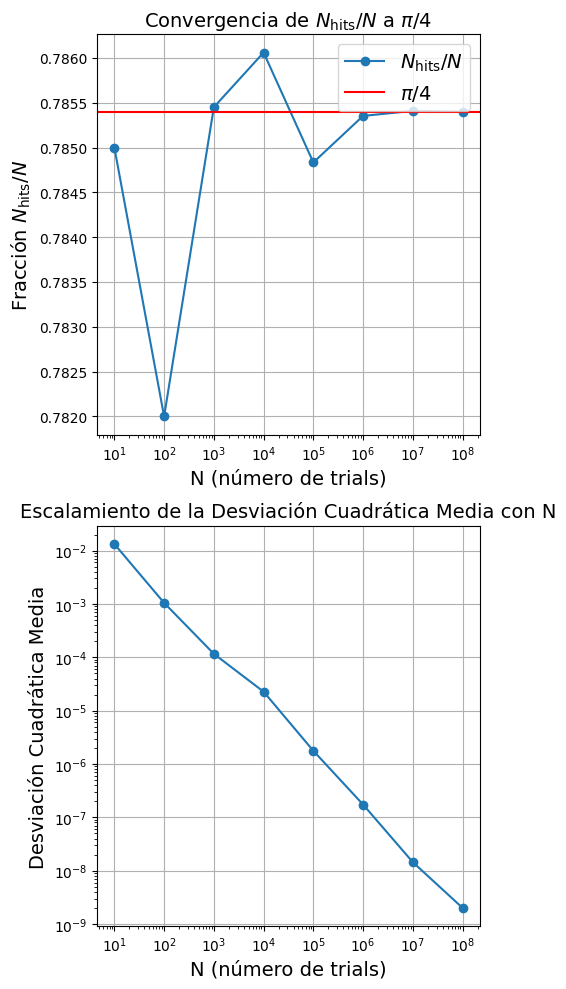

In [11]:
# Listas para almacenar los resultados
mean_square_errors = []
fraction_hits_avg = []

# Para cada valor de N, realizar las corridas y calcular la desviación cuadrática media
for N in N_values:
    n_hits_list = []
    
    for _ in range(runs):
        n_hits = direct_pi_optimizado(N)
        n_hits_list.append(n_hits)
    
    # Convertir los aciertos a fracción de hits
    fraction_hits = np.array(n_hits_list) / N
    
    # Calcular la desviación cuadrática media (MSE)
    mean_square_error = np.mean((fraction_hits - np.pi / 4) ** 2)
    mean_square_errors.append(mean_square_error)
    
    # Promedio de la fracción de hits
    fraction_hits_avg.append(np.mean(fraction_hits))

# Graficar la convergencia de N_hits / N a pi/4
plt.figure(figsize=(5,10))

# Subplot 1: Convergencia de N_hits/N a pi/4
plt.subplot(2, 1, 1)
plt.plot(N_values, fraction_hits_avg, marker='o', label=r'$N_{\text{hits}} / N$')
plt.axhline(y=np.pi / 4, color='r', linestyle='-', label=r'$\pi / 4$')
plt.xscale('log')
plt.xlabel('N (número de trials)', fontsize=14)
plt.ylabel(r'Fracción $N_{\text{hits}} / N$', fontsize=14)
plt.title(r'Convergencia de $N_{\text{hits}} / N$ a $\pi / 4$', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)

# Subplot 2: Desviación cuadrática media como función de N
plt.subplot(2, 1, 2)
plt.plot(N_values, mean_square_errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (número de trials)', fontsize=14)
plt.ylabel('Desviación Cuadrática Media', fontsize=14)
plt.title('Escalamiento de la Desviación Cuadrática Media con N', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()



In [13]:

# Función optimizada de Monte Carlo usando Markov
def markov_pi_optimizado(N, delta):
    # Inicializamos el número de aciertos y las posiciones x, y
    n_hits = 0
    x, y = 1.0, 1.0  # Partimos de un punto en el cuadrado unitario (1, 1)

    for _ in range(N):
        # Generamos un desplazamiento aleatorio Δx y Δy en el rango [-δ, δ]
        delta_x = np.random.uniform(-delta, delta)
        delta_y = np.random.uniform(-delta, delta)

        # Proponemos una nueva posición y verificamos que siga dentro del cuadrado unitario
        if abs(x + delta_x) < 1 and abs(y + delta_y) < 1:
            x += delta_x
            y += delta_y

        # Verificamos si el punto (x, y) está dentro del círculo unitario
        if x**2 + y**2 <= 1:
            n_hits += 1

    return n_hits

Estimación de pi para N = 10: 0.0
Estimación de pi para N = 100: 1.44
Estimación de pi para N = 1000: 3.192
Estimación de pi para N = 10000: 3.3132
Estimación de pi para N = 100000: 3.14452
Estimación de pi para N = 1000000: 3.132264


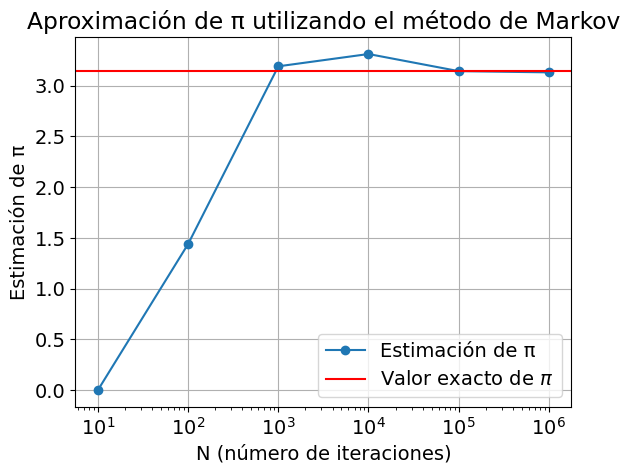

In [15]:
# Valores de N y delta
N_values = [10, 100, 1000, 10000, 100000, 1000000]
delta = 0.1  # Puedes ajustar el valor de delta

# Lista para almacenar los resultados
pi_estimado = []

# Para cada valor de N, ejecutamos markov_pi_optimizado
for N in N_values:
    n_hits = markov_pi_optimizado(N, delta)
    
    # Calculamos pi usando la fórmula 4 * (N_hits / N)
    pi_aprox = 4 * n_hits / N
    pi_estimado.append(pi_aprox)

    # Imprimir el valor estimado de pi para este N
    print(f"Estimación de pi para N = {N}: {pi_aprox}")

# Graficar los resultados
plt.plot(N_values, pi_estimado, marker='o', label='Estimación de π')
plt.axhline(y=np.pi, color='r', linestyle='-', label=r'Valor exacto de $\pi$')
plt.xscale('log')
plt.xlabel('N (número de iteraciones)')
plt.ylabel('Estimación de π')
plt.title('Aproximación de π utilizando el método de Markov')
plt.legend()
plt.grid(True)
plt.show()

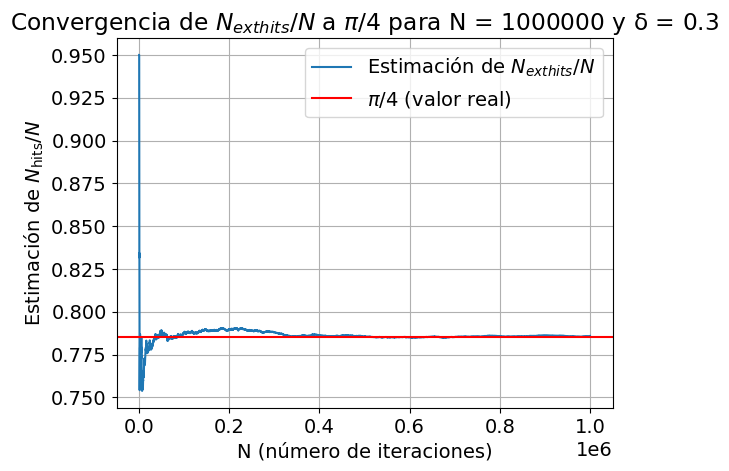

Tasa de rechazo: 0.143952


In [16]:
# Función optimizada de Monte Carlo usando Markov con un rango de tiro δ
def markov_pi_optimizado(N, delta):
    n_hits = 0
    x, y = 1.0, 1.0  # Posición inicial
    rechazos = 0  # Contador de rechazos
    estimaciones_pi = []  # Para almacenar las estimaciones de pi

    for i in range(1, N + 1):
        # Generamos un desplazamiento aleatorio Δx y Δy en el rango [-δ, δ]
        delta_x = np.random.uniform(-delta, delta)
        delta_y = np.random.uniform(-delta, delta)

        # Proponemos una nueva posición y verificamos que siga dentro del cuadrado unitario
        if abs(x + delta_x) < 1 and abs(y + delta_y) < 1:
            x += delta_x
            y += delta_y
        else:
            rechazos += 1

        # Verificamos si el punto (x, y) está dentro del círculo unitario
        if x**2 + y**2 <= 1:
            n_hits += 1

        # Almacenamos la estimación de pi cada cierta cantidad de iteraciones
        if i % 100 == 0:  # Por ejemplo, cada 100 iteraciones
            pi_estimado = n_hits / i  # Estimación de N_hits / N, que debería converger a pi/4
            estimaciones_pi.append(pi_estimado)

    tasa_rechazo = rechazos / N
    return estimaciones_pi, tasa_rechazo

# Configuración inicial
N = 1000000  # Número de iteraciones
delta = 0.3  # Rango de tiro

# Ejecutar el algoritmo Markov-Pi
estimaciones_pi, tasa_rechazo = markov_pi_optimizado(N, delta)

# Graficar la convergencia
plt.plot(range(100, N+1, 100), estimaciones_pi, label='Estimación de $N_{\text{hits}} / N$')
plt.axhline(y=np.pi / 4, color='r', linestyle='-', label=r'$\pi / 4$ (valor real)')
plt.xlabel('N (número de iteraciones)')
plt.ylabel(r'Estimación de $N_{\text{hits}} / N$')
plt.title(f'Convergencia de $N_{{\text{{hits}}}} / N$ a $\pi / 4$ para N = {N} y δ = {delta}')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tasa de rechazo
print(f"Tasa de rechazo: {tasa_rechazo}")

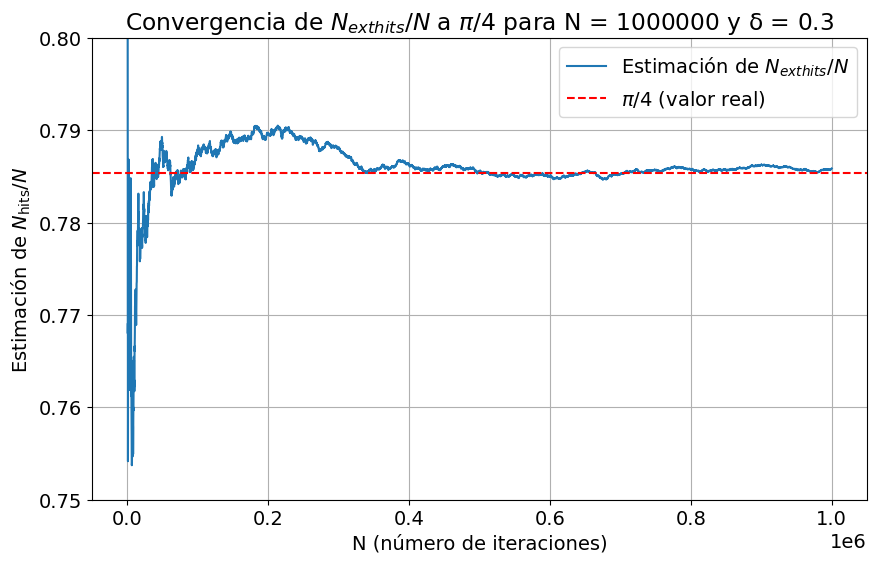

In [17]:
# Función para graficar con opción de zoom en el eje Y
def graficar_con_zoom_markov(estimaciones_pi, N, delta, y_min, y_max):
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico
    plt.plot(range(100, N+1, 100), estimaciones_pi, label='Estimación de $N_{\text{hits}} / N$')
    plt.axhline(y=np.pi / 4, color='r', linestyle='--', label=r'$\pi / 4$ (valor real)')
    plt.xlabel('N (número de iteraciones)')
    plt.ylabel(r'Estimación de $N_{\text{hits}} / N$')
    plt.title(f'Convergencia de $N_{{\text{{hits}}}} / N$ a $\pi / 4$ para N = {N} y δ = {delta}')
    plt.ylim([y_min, y_max])  # Aplicar zoom en el eje Y
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamada a la función de graficar con zoom
y_min_zoom = 0.75  # Límite inferior del zoom
y_max_zoom = 0.80  # Límite superior del zoom

graficar_con_zoom_markov(estimaciones_pi, N, delta, y_min_zoom, y_max_zoom)

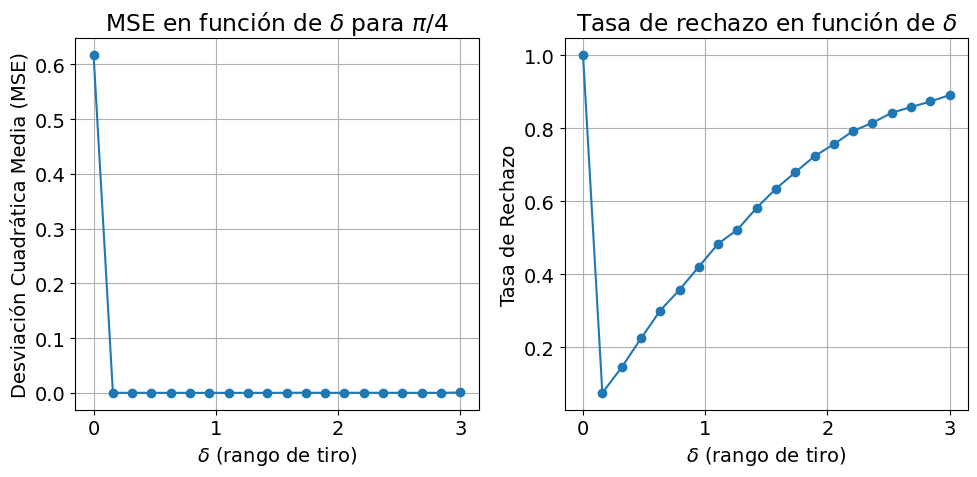

In [18]:
# Función optimizada de Monte Carlo usando Markov con un rango de tiro δ
def markov_pi_optimizado(N, delta):
    n_hits = 0
    x, y = 1.0, 1.0  # Posición inicial
    rechazos = 0  # Contador de rechazos

    for i in range(1, N + 1):
        # Generamos un desplazamiento aleatorio Δx y Δy en el rango [-δ, δ]
        delta_x = np.random.uniform(-delta, delta)
        delta_y = np.random.uniform(-delta, delta)

        # Proponemos una nueva posición y verificamos que siga dentro del cuadrado unitario
        if abs(x + delta_x) < 1 and abs(y + delta_y) < 1:
            x += delta_x
            y += delta_y
        else:
            rechazos += 1

        # Verificamos si el punto (x, y) está dentro del círculo unitario
        if x**2 + y**2 <= 1:
            n_hits += 1

    tasa_rechazo = rechazos / N
    return n_hits, tasa_rechazo

# Parámetros iniciales
delta_values = np.linspace(0, 3, 20)  # 20 valores de δ entre 0 y 3
N_fijo = 10000  # Un valor fijo de N
mean_square_errors = []
tasa_rechazos = []

# Iterar sobre los valores de δ
for delta in delta_values:
    n_hits, tasa_rechazo = markov_pi_optimizado(N_fijo, delta)
    tasa_rechazos.append(tasa_rechazo)
    
    # Estimar la fracción N_hits / N, que debería converger a pi / 4
    pi_estimado = n_hits / N_fijo
    
    # Calcular la desviación cuadrática media (MSE) comparando con pi / 4
    mse = (pi_estimado - np.pi / 4) ** 2
    mean_square_errors.append(mse)

# Graficar la desviación cuadrática media como función de δ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(delta_values, mean_square_errors, marker='o')
plt.xlabel(r'$\delta$ (rango de tiro)')
plt.ylabel('Desviación Cuadrática Media (MSE)')
plt.title('MSE en función de $\delta$ para $\pi / 4$')
plt.grid(True)

# Graficar la tasa de rechazo como función de δ
plt.subplot(1, 2, 2)
plt.plot(delta_values, tasa_rechazos, marker='o')
plt.xlabel(r'$\delta$ (rango de tiro)')
plt.ylabel('Tasa de Rechazo')
plt.title('Tasa de rechazo en función de $\delta$')
plt.grid(True)

plt.tight_layout()
plt.show()
